## Импорт необходимых документов и библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Импорт датасета и общая информация
Датасет содержит данные об оружии в компьютерной игре The Elder Scrolls V: Skyrim. Столбцы содержат название оружия, его урон, вес и цену в игровой валюте (золоте). Столбец "Upgrade" содержит информацию о том, может ли данной оружие быть улучшено, и, если может, то с помощью каких материалов. В столбце "Perk" записана характеристика материала, из которого изготовлено оружие. Также есть информация о типе оружия в столбце "Type" и о его категории (одноручное, двуручное или дальний бой) в столбце "Category", что очень важно для игрового процесса.

In [ ]:
df = pd.read_csv("Skyrim_Weapons.csv")
df

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed
0,Ancient Nord Battle Axe,18,22.0,28,Steel Ingot,Steel,Battleaxe,Two-Handed,NaN
1,Daedric Battleaxe,25,27.0,2750,Ebony Ingot,Daedric,Battleaxe,Two-Handed,NaN
2,Dragonbone Battleaxe,26,30.0,3000,Dragon Bone,Dragon,Battleaxe,Two-Handed,NaN
3,Drainblood Battleaxe,21,5.0,266,NaN,-,Battleaxe,Two-Handed,NaN
4,Dwarven Battleaxe,20,23.0,300,Dwarven Metal Ingot,Dwarven,Battleaxe,Two-Handed,NaN
...,...,...,...,...,...,...,...,...,...
288,Exploding Steel Bolt of Ice,10,0.0,5,NaN,NaN,Bolt,Archery,NaN
289,Exploding Steel Bolt of Shock,10,0.0,5,NaN,NaN,Bolt,Archery,NaN
290,Exploding Dwarven Bolt of Fire,14,0.0,15,NaN,NaN,Bolt,Archery,NaN
291,Exploding Dwarven Bolt of Ice,14,0.0,15,NaN,NaN,Bolt,Archery,NaN


## Обработка данных: работа с пропусками и выбросами

### Пропуски данных

#### Определение общего количества пропусков

In [ ]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      293 non-null    object 
 1   Damage    293 non-null    int64  
 2   Weight    293 non-null    float64
 3   Gold      293 non-null    int64  
 4   Upgrade   232 non-null    object 
 5   Perk      251 non-null    object 
 6   Type      293 non-null    object 
 7   Category  293 non-null    object 
 8   Speed     39 non-null     float64
dtypes: float64(2), int64(2), object(5)
memory usage: 20.7+ KB


Name          0
Damage        0
Weight        0
Gold          0
Upgrade      61
Perk         42
Type          0
Category      0
Speed       254
dtype: int64

Я определила количество пропусков в каждом столбце. Пропуски есть только в столбцах "Upgrade", "Perk" и "Speed". Тем не менее, это не ошибки в данных, а фактическое отсутствие этих значений для определенного оружия. Так было указано в источнике датасета. Необходимо проанализировать значения, чтобы исключить все отсутствующие данные.

#### Анализ пропусков в столбце Perk

In [ ]:
df.columns

Index(['Name', 'Damage', 'Weight', 'Gold', 'Upgrade', 'Perk', 'Type',
       'Category', 'Speed'],
      dtype='object')

In [ ]:
df["Perk"].unique()

array(['Steel', 'Daedric', 'Dragon', 'None', 'Dwarven', 'Ebony', 'Elven',
       'Glass', 'Advanced', 'Orcish'], dtype=object)

В уникальных значениях столбца "Perk" помимо существующих перков и отсутствующих значений ("nan") встречаются также значения "-", "–", которые нужно также внести в количество отсутствующих значений. И для удобства все лучше заменить на "None"



In [ ]:
df["Perk"] = df["Perk"].replace("-", "None")
df["Perk"] = df["Perk"].replace("–", "None")
df["Perk"] = df["Perk"].fillna("None")
df.info()  # проверка
df["Perk"].unique()  # проверка уникальных значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      293 non-null    object 
 1   Damage    293 non-null    int64  
 2   Weight    293 non-null    float64
 3   Gold      293 non-null    int64  
 4   Upgrade   232 non-null    object 
 5   Perk      293 non-null    object 
 6   Type      293 non-null    object 
 7   Category  293 non-null    object 
 8   Speed     39 non-null     float64
dtypes: float64(2), int64(2), object(5)
memory usage: 20.7+ KB


array(['Steel', 'Daedric', 'Dragon', 'None', 'Dwarven', 'Ebony', 'Elven',
       'Glass', 'Advanced', 'Orcish'], dtype=object)

Пропуски обусловлены спецификой данных из столбца, соответственно, удалять или заполнять их нет необходимости

#### Анализ пропусков в столбце "Upgrade"

In [ ]:
# аналогичная проверка уникальных значений, помимо пропусков есть значение "None required"
df["Upgrade"].unique()

array(['Steel Ingot', 'Ebony Ingot', 'Dragon Bone', 'None',
       'Dwarven Metal Ingot', 'Refined Moonstone', 'Refined Malachite',
       'Iron Ingot', 'Quicksilver Ingot', 'Orichalcum Ingot', 'Stalhrim',
       'Chaurus Chitin', '3 Ectoplasm', 'Daedra HeartEbony Ingot',
       'Firewood', 'Silver Ingot', 'Leather Strips',
       'Dwarven metal ingot'], dtype=object)

In [ ]:
df["Upgrade"] = df["Upgrade"].replace("None required", "None")
df["Upgrade"] = df["Upgrade"].fillna("None")
df.info()  # проверка
df["Upgrade"].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      293 non-null    object 
 1   Damage    293 non-null    int64  
 2   Weight    293 non-null    float64
 3   Gold      293 non-null    int64  
 4   Upgrade   293 non-null    object 
 5   Perk      293 non-null    object 
 6   Type      293 non-null    object 
 7   Category  293 non-null    object 
 8   Speed     39 non-null     float64
dtypes: float64(2), int64(2), object(5)
memory usage: 20.7+ KB


array(['Steel Ingot', 'Ebony Ingot', 'Dragon Bone', 'None',
       'Dwarven Metal Ingot', 'Refined Moonstone', 'Refined Malachite',
       'Iron Ingot', 'Quicksilver Ingot', 'Orichalcum Ingot', 'Stalhrim',
       'Chaurus Chitin', '3 Ectoplasm', 'Daedra HeartEbony Ingot',
       'Firewood', 'Silver Ingot', 'Leather Strips',
       'Dwarven metal ingot'], dtype=object)

Пропуски логичны и обусловлены, соответственно замена или удаление данных не понадобятся

#### Анализ других категориальных столбцов на пропуски, которые мог не распознать питон

In [ ]:
df["Category"].unique()

array(['Two-Handed', 'One-Handed', 'Archery'], dtype=object)

In [ ]:
df["Type"].unique()

array(['Battleaxe', 'Dagger', 'Mace', 'Sword', 'War Axe', 'Silverware',
       'Greatsword', 'Warhammer', 'Bow', 'Arrow', 'Crossbow', 'Bolt'],
      dtype=object)

Я проверила уникальные значения столбцов "Category" и "Type", чтобы исключить возможность отстутствующих значений, не распознанных программой в них. Пропусков не обнаружено.

#### Анализ пропусков в столбце `Speed`

В этом столбце содержалось очень много пропусков. Может быть, вывод строк, где значения есть, помог бы определить между ними что-то общее.

In [ ]:
df[df["Speed"].isna() == False]

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed,Combat Type,DPS,Behoof
0,Ancient Nord Battle Axe,18,22.0,28,Steel Ingot,Steel,Battleaxe,Two-Handed,0.7,Close Combat,12.6,0.642857
1,Daedric Battleaxe,25,27.0,2750,Ebony Ingot,Daedric,Battleaxe,Two-Handed,0.7,Close Combat,17.5,0.009091
2,Dragonbone Battleaxe,26,30.0,3000,Dragon Bone,Dragon,Battleaxe,Two-Handed,0.7,Close Combat,18.2,0.008667
3,Drainblood Battleaxe,21,5.0,266,None,None,Battleaxe,Two-Handed,0.7,Close Combat,14.7,0.078947
4,Dwarven Battleaxe,20,23.0,300,Dwarven Metal Ingot,Dwarven,Battleaxe,Two-Handed,0.7,Close Combat,14.0,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...
288,Exploding Steel Bolt of Ice,10,0.0,5,None,None,Bolt,Archery,0.0,Projectile,0.0,2.000000
289,Exploding Steel Bolt of Shock,10,0.0,5,None,None,Bolt,Archery,0.0,Projectile,0.0,2.000000
290,Exploding Dwarven Bolt of Fire,14,0.0,15,None,None,Bolt,Archery,0.0,Projectile,0.0,0.933333
291,Exploding Dwarven Bolt of Ice,14,0.0,15,None,None,Bolt,Archery,0.0,Projectile,0.0,0.933333


Возможно, значения скорости есть только для луков. Это нужно проверить.

In [ ]:
df[
    (df["Speed"].isna() == True) & (df["Type"] == "Bow")
]  # для всех ли луков есть значения скорости

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed


Проверка показала, что значения столбца "Speed" относятся только к типу оружия "Bow", при этом значения есть для абсолютно всех луков. Соответственно, пропуски логичны, для удобства заполним отсутствующие значения нулями.

In [ ]:
df["Speed"] = df["Speed"].fillna(0)
df

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed
0,Ancient Nord Battle Axe,18,22.0,28,Steel Ingot,Steel,Battleaxe,Two-Handed,0.0
1,Daedric Battleaxe,25,27.0,2750,Ebony Ingot,Daedric,Battleaxe,Two-Handed,0.0
2,Dragonbone Battleaxe,26,30.0,3000,Dragon Bone,Dragon,Battleaxe,Two-Handed,0.0
3,Drainblood Battleaxe,21,5.0,266,None,None,Battleaxe,Two-Handed,0.0
4,Dwarven Battleaxe,20,23.0,300,Dwarven Metal Ingot,Dwarven,Battleaxe,Two-Handed,0.0
...,...,...,...,...,...,...,...,...,...
288,Exploding Steel Bolt of Ice,10,0.0,5,None,None,Bolt,Archery,0.0
289,Exploding Steel Bolt of Shock,10,0.0,5,None,None,Bolt,Archery,0.0
290,Exploding Dwarven Bolt of Fire,14,0.0,15,None,None,Bolt,Archery,0.0
291,Exploding Dwarven Bolt of Ice,14,0.0,15,None,None,Bolt,Archery,0.0


### Анализ возможных выбросов

На выбросы я буду проверять только числовые столбцы, так как пропусков там не обнаружено и исключена возможность необнаруженных пропусков типа значений "None required".

#### Анализ выбросов в столбце "Damage"

0
28


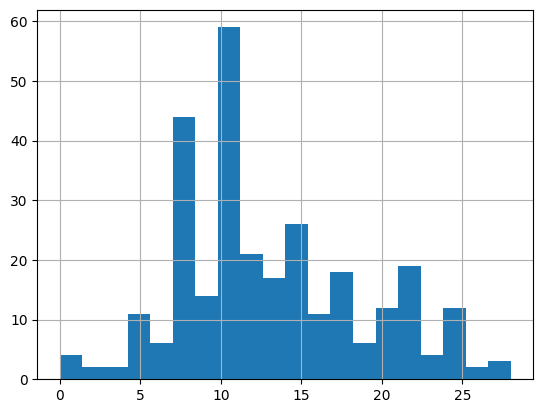

In [ ]:
df["Damage"].hist(bins=20)  # использование диаграммы и предельных значений
print(df["Damage"].min())
print(df["Damage"].max())

<Axes: ylabel='Damage'>

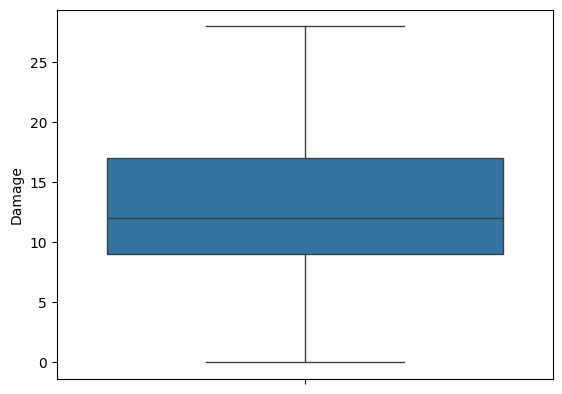

In [ ]:
sns.boxplot(df["Damage"])  # использование boxplot

Выбросов в столбце "Damage" не обнаружено.

#### Анализ выбросов в столбце "Weight"

<Axes: ylabel='Weight'>

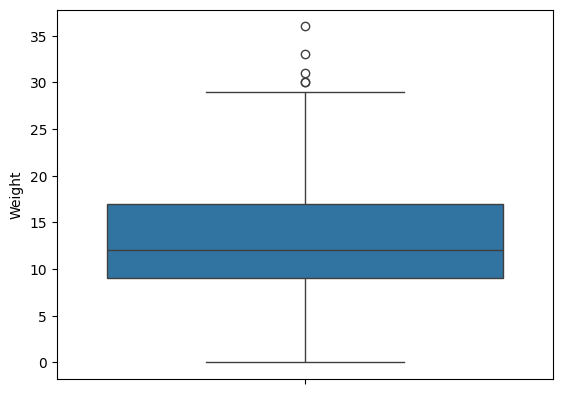

In [ ]:
sns.boxplot(df["Weight"])

0.0
36.0


,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed
2,Dragonbone Battleaxe,26,30.0,3000,Dragon Bone,Dragon,Battleaxe,Two-Handed,0.0
20,Tsun's Battleaxe,27,36.0,1000,None,None,Battleaxe,Two-Handed,0.0
205,Daedric Warhammer,27,31.0,4000,Ebony Ingot,Daedric,Warhammer,Two-Handed,0.0
208,Dragonbone Warhammer,28,33.0,4275,Dragon Bone,Dragon,Warhammer,Two-Handed,0.0
210,Ebony Warhammer,25,30.0,1725,Ebony Ingot,Ebony,Warhammer,Two-Handed,0.0


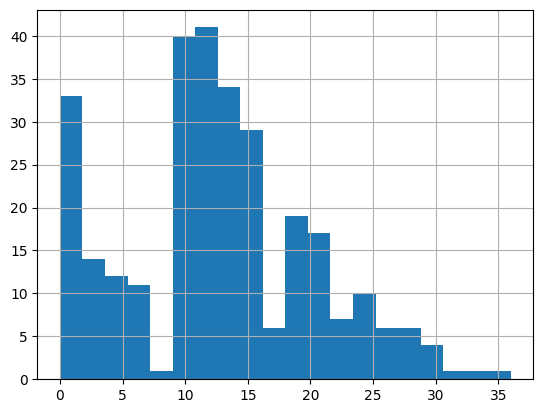

In [ ]:
df["Weight"].hist(bins=20)
print(df["Weight"].min())
print(df["Weight"].max())
df.loc[df["Weight"] >= 30]

График "Boxplot" показал несколько выбросов с весом более 30, но вывев их, можно понять, что выбросы логичны и обоснованы, так как двурурчный боевой топор или секира вполне может иметь большой вес.

#### Анализ выбросов в столбце "Gold"

<Axes: ylabel='Gold'>

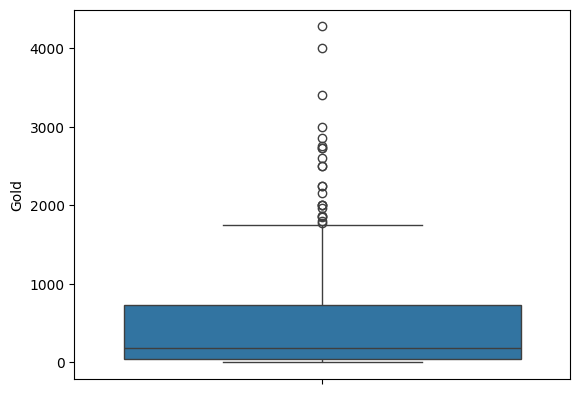

In [ ]:
sns.boxplot(df["Gold"])

Все выбросы логичны, ничего не изменяем

## Создание новых признаков


### Первый признак – Ближний/Дальний бой

Создадим признак, характеризующий оружие на ближний и дальний бой

In [ ]:
df["Type"].unique()

array(['Battleaxe', 'Dagger', 'Mace', 'Sword', 'War Axe', 'Silverware',
       'Greatsword', 'Warhammer', 'Bow', 'Arrow', 'Crossbow', 'Bolt'],
      dtype=object)

Выведем уникальные значения, чтобы разделить типы оружия на категории. Далее напишем функцию для столбца "Combat Type"

In [ ]:
def combat(x: str) -> str:
    if x in ["Bow", "Crossbow"]:
        return "Ranged Combat"
    elif x in ["Bolt", "Arrow"]:
        return "Projectile"
    elif x == "Silverware":
        return "Utensil"
    else:
        return "Close Combat"


df["Combat Type"] = df["Type"].apply(combat)
df

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed,Combat Type
0,Ancient Nord Battle Axe,18,22.0,28,Steel Ingot,Steel,Battleaxe,Two-Handed,0.0,Close Combat
1,Daedric Battleaxe,25,27.0,2750,Ebony Ingot,Daedric,Battleaxe,Two-Handed,0.0,Close Combat
2,Dragonbone Battleaxe,26,30.0,3000,Dragon Bone,Dragon,Battleaxe,Two-Handed,0.0,Close Combat
3,Drainblood Battleaxe,21,5.0,266,None,None,Battleaxe,Two-Handed,0.0,Close Combat
4,Dwarven Battleaxe,20,23.0,300,Dwarven Metal Ingot,Dwarven,Battleaxe,Two-Handed,0.0,Close Combat
...,...,...,...,...,...,...,...,...,...,...
288,Exploding Steel Bolt of Ice,10,0.0,5,None,None,Bolt,Archery,0.0,Projectile
289,Exploding Steel Bolt of Shock,10,0.0,5,None,None,Bolt,Archery,0.0,Projectile
290,Exploding Dwarven Bolt of Fire,14,0.0,15,None,None,Bolt,Archery,0.0,Projectile
291,Exploding Dwarven Bolt of Ice,14,0.0,15,None,None,Bolt,Archery,0.0,Projectile


### Второй признак - DPS

Чтобы лучше анализировать урон оружия в игре, стоит найти DPS. Для этого я загрузила данные для каждого типа оружия с сайта Unofficial Elder Scrolls Pages.

#### Импорт необходимых данных

In [ ]:
import urllib.request
import re

url = 'https://en.uesp.net/wiki/Skyrim:Weapons'
response = urllib.request.urlopen(url)
html = response.read().decode('utf-8')
html

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Skyrim:Weapons - The Unofficial Elder Scrolls Pages (UESP)</title>\n<script>document.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );</script>\n<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"Skyrim","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":134,"wgPageName":"Skyrim:Weapons","wgTitle":"Weapons","wgCurRevisionId":2959846,"wgRevisionId":2959846,"wgArticleId":98917,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Semi Protection","Move Protection","All Pages Missing Data","Skyrim-Pages Missing Data","Skyrim-Items","Skyrim-Weapons","Skyrim-Bugs Fixed by the Official Skyrim Special Edition Patch","Skyrim-Bugs Fixed by the Unofficial Skyrim Patch","Skyrim-Bugs Fixed by the Official Skyrim Patch"],"w

In [ ]:
pattern = r'<h3><span class="mw-headline" id="[ \w]+">([ \w]+)</span></h3>.*?<li><b>Speed</b>: (\d+\.?\d*)'

matches = re.findall(pattern, html, flags=re.DOTALL)
matches

[('Swords', '1'),
 ('War Axes', '0.9'),
 ('Maces', '0.8'),
 ('Daggers', '1.3'),
 ('Greatswords', '0.7'),
 ('Battleaxes', '0.7'),
 ('Warhammers', '0.6')]

In [ ]:
close_combat_speeds = {key[:-1:]:float(value) for (key, value) in matches}
close_combat_speeds

{'Sword': 1.0,
 'War Axe': 0.9,
 'Mace': 0.8,
 'Dagger': 1.3,
 'Greatsword': 0.7,
 'Battleaxe': 0.7,
 'Warhammer': 0.6}

Скорость луков и арбалетов рассчитывается по формуле, ее мы посчитаем позже.

In [ ]:
#внесение данных в таблицу
df.loc[df['Combat Type'] == 'Close Combat', 'Speed'] = df[df['Combat Type'] == 'Close Combat']['Type'].apply(lambda x: close_combat_speeds[x])
df

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed,Combat Type
0,Ancient Nord Battle Axe,18,22.0,28,Steel Ingot,Steel,Battleaxe,Two-Handed,0.7,Close Combat
1,Daedric Battleaxe,25,27.0,2750,Ebony Ingot,Daedric,Battleaxe,Two-Handed,0.7,Close Combat
2,Dragonbone Battleaxe,26,30.0,3000,Dragon Bone,Dragon,Battleaxe,Two-Handed,0.7,Close Combat
3,Drainblood Battleaxe,21,5.0,266,None,None,Battleaxe,Two-Handed,0.7,Close Combat
4,Dwarven Battleaxe,20,23.0,300,Dwarven Metal Ingot,Dwarven,Battleaxe,Two-Handed,0.7,Close Combat
...,...,...,...,...,...,...,...,...,...,...
288,Exploding Steel Bolt of Ice,10,0.0,5,None,None,Bolt,Archery,0.0,Projectile
289,Exploding Steel Bolt of Shock,10,0.0,5,None,None,Bolt,Archery,0.0,Projectile
290,Exploding Dwarven Bolt of Fire,14,0.0,15,None,None,Bolt,Archery,0.0,Projectile
291,Exploding Dwarven Bolt of Ice,14,0.0,15,None,None,Bolt,Archery,0.0,Projectile


In [ ]:
df['DPS'] = 0.0 #зададим скорость категорий, не имеющих скорости (Projectile, Utensil) как 0
df

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed,Combat Type,DPS
0,Ancient Nord Battle Axe,18,22.0,28,Steel Ingot,Steel,Battleaxe,Two-Handed,0.7,Close Combat,0.0
1,Daedric Battleaxe,25,27.0,2750,Ebony Ingot,Daedric,Battleaxe,Two-Handed,0.7,Close Combat,0.0
2,Dragonbone Battleaxe,26,30.0,3000,Dragon Bone,Dragon,Battleaxe,Two-Handed,0.7,Close Combat,0.0
3,Drainblood Battleaxe,21,5.0,266,None,None,Battleaxe,Two-Handed,0.7,Close Combat,0.0
4,Dwarven Battleaxe,20,23.0,300,Dwarven Metal Ingot,Dwarven,Battleaxe,Two-Handed,0.7,Close Combat,0.0
...,...,...,...,...,...,...,...,...,...,...,...
288,Exploding Steel Bolt of Ice,10,0.0,5,None,None,Bolt,Archery,0.0,Projectile,0.0
289,Exploding Steel Bolt of Shock,10,0.0,5,None,None,Bolt,Archery,0.0,Projectile,0.0
290,Exploding Dwarven Bolt of Fire,14,0.0,15,None,None,Bolt,Archery,0.0,Projectile,0.0
291,Exploding Dwarven Bolt of Ice,14,0.0,15,None,None,Bolt,Archery,0.0,Projectile,0.0


In [ ]:
close_combat_slice = df['Combat Type'] == 'Close Combat' #проверка
df[close_combat_slice]

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed,Combat Type,DPS
0,Ancient Nord Battle Axe,18,22.0,28,Steel Ingot,Steel,Battleaxe,Two-Handed,0.7,Close Combat,0.0
1,Daedric Battleaxe,25,27.0,2750,Ebony Ingot,Daedric,Battleaxe,Two-Handed,0.7,Close Combat,0.0
2,Dragonbone Battleaxe,26,30.0,3000,Dragon Bone,Dragon,Battleaxe,Two-Handed,0.7,Close Combat,0.0
3,Drainblood Battleaxe,21,5.0,266,None,None,Battleaxe,Two-Handed,0.7,Close Combat,0.0
4,Dwarven Battleaxe,20,23.0,300,Dwarven Metal Ingot,Dwarven,Battleaxe,Two-Handed,0.7,Close Combat,0.0
...,...,...,...,...,...,...,...,...,...,...,...
217,Stalhrim Warhammer,26,29.0,2850,Stalhrim,Ebony,Warhammer,Two-Handed,0.6,Close Combat,0.0
218,Steel Warhammer,20,25.0,110,Steel Ingot,Steel,Warhammer,Two-Handed,0.6,Close Combat,0.0
219,The Longhammer,21,18.0,90,Orichalcum Ingot,Orcish,Warhammer,Two-Handed,0.6,Close Combat,0.0
220,Trollsbane,20,25.0,121,Steel Ingot,Steel,Warhammer,Two-Handed,0.6,Close Combat,0.0


####Расчет столбца DPS



In [ ]:
#внесем значения в DPS
df.loc[close_combat_slice, 'DPS'] = df[close_combat_slice]['Damage'] * df[close_combat_slice]['Speed']
df

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed,Combat Type,DPS
0,Ancient Nord Battle Axe,18,22.0,28,Steel Ingot,Steel,Battleaxe,Two-Handed,0.7,Close Combat,12.6
1,Daedric Battleaxe,25,27.0,2750,Ebony Ingot,Daedric,Battleaxe,Two-Handed,0.7,Close Combat,17.5
2,Dragonbone Battleaxe,26,30.0,3000,Dragon Bone,Dragon,Battleaxe,Two-Handed,0.7,Close Combat,18.2
3,Drainblood Battleaxe,21,5.0,266,None,None,Battleaxe,Two-Handed,0.7,Close Combat,14.7
4,Dwarven Battleaxe,20,23.0,300,Dwarven Metal Ingot,Dwarven,Battleaxe,Two-Handed,0.7,Close Combat,14.0
...,...,...,...,...,...,...,...,...,...,...,...
288,Exploding Steel Bolt of Ice,10,0.0,5,None,None,Bolt,Archery,0.0,Projectile,0.0
289,Exploding Steel Bolt of Shock,10,0.0,5,None,None,Bolt,Archery,0.0,Projectile,0.0
290,Exploding Dwarven Bolt of Fire,14,0.0,15,None,None,Bolt,Archery,0.0,Projectile,0.0
291,Exploding Dwarven Bolt of Ice,14,0.0,15,None,None,Bolt,Archery,0.0,Projectile,0.0


In [ ]:
ranged_combat_slice = df['Combat Type'] == 'Ranged Combat' #проверим значения дальнего боя
df[ranged_combat_slice]

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed,Combat Type,DPS
222,Ancient Nord Bow,8,12.0,45,Steel Ingot,Steel,Bow,Archery,0.8750,Ranged Combat,0.0
223,Angi's Bow,7,7.0,50,Steel Ingot,Steel,Bow,Archery,0.9370,Ranged Combat,0.0
224,Auriel's Bow DG,13,11.0,1000,Refined Moonstone,Elven,Bow,Archery,1.0000,Ranged Combat,0.0
225,Bow of the Hunt,10,7.0,434,Steel Ingot,Steel,Bow,Archery,0.9370,Ranged Combat,0.0
226,Daedric Bow,19,18.0,2500,Ebony Ingot,Daedric,Bow,Archery,0.5000,Ranged Combat,0.0
227,Dragonbone Bow DG,20,20.0,2725,Dragon Bone,Dragon,Bow,Archery,0.7500,Ranged Combat,0.0
228,Drainspell Bow,14,6.0,458,None,None,Bow,Archery,0.8750,Ranged Combat,0.0
229,Dravin's Bow,7,7.0,50,Leather Strips,Steel,Bow,Archery,0.9370,Ranged Combat,0.0
230,Dwarven Bow,12,10.0,270,Dwarven Metal Ingot,Dwarven,Bow,Archery,0.7500,Ranged Combat,0.0
231,Dwarven Black Bow of Fate DR,13,10.0,1446,Ebony Ingot,Dwarven,Bow,Archery,0.7500,Ranged Combat,0.0


$dt = 0.4 + \frac{1.66}{speed}$

$dps = \frac{dmg}{dt}$

Формула для расчета DPS луков и арбалетов с Unofficial Elder Scrolls Pages

$Выгода = \frac{Damage}{Gold}$

In [ ]:
#внесем формулу в столбец DPS для оружия дальнего боя
df.loc[ranged_combat_slice, 'DPS'] = df[ranged_combat_slice]['Damage'] * 1 / (0.4 + 1.66 / df[ranged_combat_slice]['Speed'])
df[ranged_combat_slice]

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed,Combat Type,DPS
222,Ancient Nord Bow,8,12.0,45,Steel Ingot,Steel,Bow,Archery,0.8750,Ranged Combat,3.482587
223,Angi's Bow,7,7.0,50,Steel Ingot,Steel,Bow,Archery,0.9370,Ranged Combat,3.223413
224,Auriel's Bow DG,13,11.0,1000,Refined Moonstone,Elven,Bow,Archery,1.0000,Ranged Combat,6.310680
225,Bow of the Hunt,10,7.0,434,Steel Ingot,Steel,Bow,Archery,0.9370,Ranged Combat,4.604875
226,Daedric Bow,19,18.0,2500,Ebony Ingot,Daedric,Bow,Archery,0.5000,Ranged Combat,5.107527
227,Dragonbone Bow DG,20,20.0,2725,Dragon Bone,Dragon,Bow,Archery,0.7500,Ranged Combat,7.653061
228,Drainspell Bow,14,6.0,458,None,None,Bow,Archery,0.8750,Ranged Combat,6.094527
229,Dravin's Bow,7,7.0,50,Leather Strips,Steel,Bow,Archery,0.9370,Ranged Combat,3.223413
230,Dwarven Bow,12,10.0,270,Dwarven Metal Ingot,Dwarven,Bow,Archery,0.7500,Ranged Combat,4.591837
231,Dwarven Black Bow of Fate DR,13,10.0,1446,Ebony Ingot,Dwarven,Bow,Archery,0.7500,Ranged Combat,4.974490


### Третий признак - выгода
Цена, деленная на урон оружия показывает, сколько голды нужно отдать за единицу урона. То есть показывает, что топ за свои деньги. Я поделила урон на цену, чтобы значения интерпретировались как "чем больше выгода, тем лучше"

In [ ]:
df["Behoof"] = df["Damage"] / df["Gold"]
df.sort_values(by="Behoof", ascending=False)

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed,Combat Type,DPS,Behoof
277,Rusty Arrow,4,0.0,0,None,None,Arrow,Archery,0.0,Projectile,0.0,inf
126,Phantom Sword,1,0.0,0,None,None,Sword,One-Handed,1.0,Close Combat,1.0,inf
266,Dwarven Sphere Centurion Arrow,20,0.0,0,None,None,Arrow,Archery,0.0,Projectile,0.0,inf
285,Steel Bolt,10,0.0,1,None,None,Bolt,Archery,0.0,Projectile,0.0,10.000000
261,Ancient Nord Arrow,10,0.0,1,None,None,Arrow,Archery,0.0,Projectile,0.0,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
190,Ebony Blade,11,10.0,2000,None,None,Greatsword,Two-Handed,0.7,Close Combat,7.7,0.005500
104,Harkon's Sword,8,9.0,1472,Steel Ingot,Steel,Sword,One-Handed,1.0,Close Combat,8.0,0.005435
87,Dragonbane (Lvl 46+),14,14.0,2596,Quicksilver Ingot,Steel,Sword,One-Handed,1.0,Close Combat,14.0,0.005393
158,Hoarfrost,5,10.0,946,None,None,War Axe,One-Handed,0.9,Close Combat,4.5,0.005285


In [ ]:
df["Behoof"] = df["Behoof"].fillna(0)
df.loc[df["Behoof"] == np.inf, "Behoof"] = df[df["Behoof"] == np.inf]["Damage"]
df.sort_values(by="Behoof", ascending=False)

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed,Combat Type,DPS,Behoof
266,Dwarven Sphere Centurion Arrow,20,0.0,0,None,None,Arrow,Archery,0.0,Projectile,0.0,20.000000
285,Steel Bolt,10,0.0,1,None,None,Bolt,Archery,0.0,Projectile,0.0,10.000000
261,Ancient Nord Arrow,10,0.0,1,None,None,Arrow,Archery,0.0,Projectile,0.0,10.000000
272,Iron Arrow,8,0.0,1,None,None,Arrow,Archery,0.0,Projectile,0.0,8.000000
270,Forsworn Arrow,7,0.0,1,None,None,Arrow,Archery,0.0,Projectile,0.0,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
190,Ebony Blade,11,10.0,2000,None,None,Greatsword,Two-Handed,0.7,Close Combat,7.7,0.005500
104,Harkon's Sword,8,9.0,1472,Steel Ingot,Steel,Sword,One-Handed,1.0,Close Combat,8.0,0.005435
87,Dragonbane (Lvl 46+),14,14.0,2596,Quicksilver Ingot,Steel,Sword,One-Handed,1.0,Close Combat,14.0,0.005393
158,Hoarfrost,5,10.0,946,None,None,War Axe,One-Handed,0.9,Close Combat,4.5,0.005285


## Гипотезы

### Гипотеза 1

Как правило, луки и арбалеты наиболее выгодны для покупки (Средняя выгода от покупки лука или арбалета по столбцу "Behoof" больше, чем выгода от покупки оружия ближнего боя)

Я не использую в анализе категории "Projectile" и "Utensil" так как это фактически не оружие, а расходные материалы

In [ ]:
a = df.loc[df["Combat Type"] == "Ranged Combat", "Behoof"].mean()
b = df.loc[df["Combat Type"] == "Close Combat", "Behoof"].mean()
print(a, b)

0.16602683654907946 0.1689938676447477


Очевидно, что значения выгоды почти эквиваленты. Но всё-таки, выгода от покупки оружия ближнего боя чуть больше. Гипотеза не подтвердилась.

### Гипотеза 2

Сборка в двуручное оружие выгоднее других по максимальному урону

Пояснение: в игре существуют следующие сборки по оружию: сборка в двуручное оружие (заняты две руки), сборка в два одноручных оружия (в обе руки) и сборка в лучника (урон лука суммируется с уроном стрел)

Для проверки этой гипотезы нам нужно найти двуручное оружие с наибольшим уроном, два уникальных одноручных оружия с наибольшим уроном, лук или арбалет с наибольшим уроном и стрелы или болты с наибольшим уроном. После этого нужно проверить, от какой сборки суммарный урон больше.

#### Максимальный урон каждой категории

In [ ]:
# находим максимумы значений
max_th_damage = df.loc[df["Category"] == "Two-Handed", "Damage"].max()
two_handed_max = df.loc[df["Damage"] == max_th_damage]
print(max_th_damage)
two_handed_max

28


,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed,Combat Type,DPS,Behoof
208,Dragonbone Warhammer,28,33.0,4275,Dragon Bone,Dragon,Warhammer,Two-Handed,0.6,Close Combat,16.8,0.00655


In [ ]:
max_oh_damage = df.loc[df["Category"] == "One-Handed", "Damage"].max()
one_handed_max = df.loc[
    (df["Damage"] == max_oh_damage) & (df["Category"] == "One-Handed")
]
print(max_oh_damage)
one_handed_max

17


,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed,Combat Type,DPS,Behoof
48,Dragonbone Mace,17,22.0,2000,Dragon Bone,Dragon,Mace,One-Handed,0.8,Close Combat,13.6,0.0085


In [ ]:
df2 = df.drop(index=48)
max_oh_damage2 = df2.loc[df2["Category"] == "One-Handed", "Damage"].max()
one_handed_max_2 = df2.loc[
    (df2["Damage"] == max_oh_damage2) & (df2["Category"] == "One-Handed")
]
print(max_oh_damage2)
one_handed_max_2

16


,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed,Combat Type,DPS,Behoof
47,Daedric Mace,16,20.0,1750,Ebony Ingot,Daedric,Mace,One-Handed,0.8,Close Combat,12.8,0.009143
50,Ebony Mace,16,19.0,1000,Ebony Ingot,Ebony,Mace,One-Handed,0.8,Close Combat,12.8,0.016000
61,Mace of Molag Bal,16,18.0,1257,Ebony Ingot,None,Mace,One-Handed,0.8,Close Combat,12.8,0.012729
66,Stalhrim Mace,16,18.0,1375,Stalhrim,Ebony,Mace,One-Handed,0.8,Close Combat,12.8,0.011636
117,Miraak's Sword,16,3.0,427,Daedra HeartEbony Ingot,Dwarven,Sword,One-Handed,1.0,Close Combat,16.0,0.037471
150,Dragonbone War Axe,16,21.0,1700,Dragon Bone,Dragon,War Axe,One-Handed,0.9,Close Combat,14.4,0.009412


In [ ]:
max_rc_damage = df.loc[df["Combat Type"] == "Ranged Combat", "Damage"].max()
archery_max = df.loc[
    (df["Damage"] == max_rc_damage) & (df["Combat Type"] == "Ranged Combat")
]
print(max_rc_damage)
archery_max

25


,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed,Combat Type,DPS,Behoof
248,Karliah's Bow,25,9.0,5,None,None,Bow,Archery,0.625,Ranged Combat,8.180628,5.0


In [ ]:
max_proj_damage = df.loc[df["Combat Type"] == "Projectile", "Damage"].max()
projectile_max = df.loc[
    (df["Damage"] == max_proj_damage) & (df["Combat Type"] == "Projectile")
]
print(max_proj_damage)
projectile_max

25


,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed,Combat Type,DPS,Behoof
264,Dragonbone Arrow DG,25,0.0,9,None,None,Arrow,Archery,0.0,Projectile,0.0,2.777778


In [ ]:
# Проверяем гипотезу
th_assembling = int(max_th_damage)
oh_assembling = int(max_oh_damage2) + int(max_oh_damage)
arc_assembling = max_rc_damage + max_proj_damage
if th_assembling > oh_assembling and th_assembling > arc_assembling:
    print("Двуручная сборка", th_assembling)
elif oh_assembling > arc_assembling and oh_assembling > th_assembling:
    print("Одноручная сборка", oh_assembling)
else:
    print("Сборка дальнего боя", arc_assembling)

Сборка дальнего боя 50


In [ ]:
df_max = pd.DataFrame(
    data=[
        [th_assembling, 0, 0, 0],
        [max_oh_damage, max_oh_damage2, 0, 0],
        [0, 0, max_rc_damage, max_proj_damage],
    ],
    columns=[
        "Оружие в правой руке",
        "Оружие в левой руке",
        "Дальнебойное оружие",
        "Стрела или болт",
    ],
    index=["Двуручная сборка", "Одноручная сборка", "Сборка дальнего боя"],
)
df_max

,Оружие в правой руке,Оружие в левой руке,Дальнебойное оружие,Стрела или болт
Двуручная сборка,28,0,0,0
Одноручная сборка,17,16,0,0
Сборка дальнего боя,0,0,25,25


<Axes: >

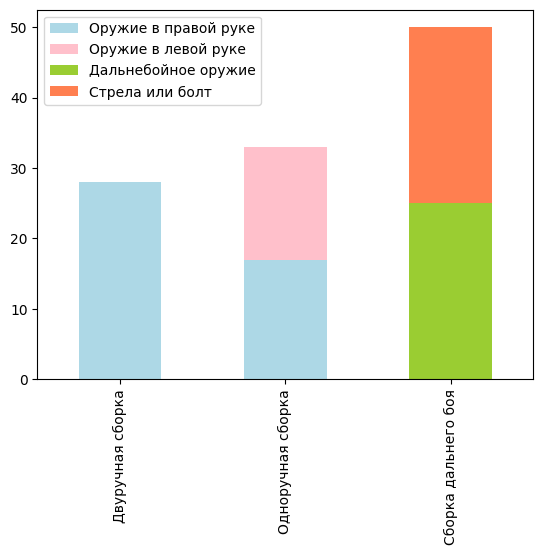

In [ ]:
df_max.plot(kind="bar", stacked=True, color=["lightblue", "pink", "yellowgreen", "coral"])

Очевидно, выгоднее других сборка лучника. Но эти данные без учета DPS, а это также влияет на урон, наносимый оружием.

#### Проверим значения для "DPS"

In [ ]:
max_th_dps = df.loc[df["Category"] == "Two-Handed", "DPS"].max()
two_handed_dps = df.loc[df["DPS"] == max_th_dps]
print(max_th_dps)
two_handed_dps

18.9


,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed,Combat Type,DPS,Behoof
20,Tsun's Battleaxe,27,36.0,1000,None,None,Battleaxe,Two-Handed,0.7,Close Combat,18.9,0.027


In [ ]:
max_oh_dps = df.loc[df["Category"] == "One-Handed", "DPS"].max()
one_handed_dps = df.loc[
    (df["DPS"] == max_oh_dps) & (df["Category"] == "One-Handed")
]
print(max_oh_dps)
one_handed_dps

16.0


,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed,Combat Type,DPS,Behoof
117,Miraak's Sword,16,3.0,427,Daedra HeartEbony Ingot,Dwarven,Sword,One-Handed,1.0,Close Combat,16.0,0.037471


In [ ]:
df2 = df.drop(index=117)
max_oh_dps2 = df2.loc[df2["Category"] == "One-Handed", "DPS"].max()
one_handed_dps2 = df2.loc[
    (df2["DPS"] == max_oh_dps2) & (df2["Category"] == "One-Handed")
]
print(max_oh_dps2)
one_handed_dps2

15.600000000000001


,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed,Combat Type,DPS,Behoof
23,Blade of Woe,12,7.0,880,None,Steel,Dagger,One-Handed,1.3,Close Combat,15.6,0.013636
28,Dragonbone Dagger,12,6.5,600,Dragon Bone,Dragon,Dagger,One-Handed,1.3,Close Combat,15.6,0.020000


In [ ]:
max_rc_dps = df.loc[df["Combat Type"] == "Ranged Combat", "DPS"].max()
archery_dps = df.loc[
    (df["DPS"] == max_rc_dps) & (df["Combat Type"] == "Ranged Combat")
]
print(max_rc_dps)
archery_dps

8.18062827225131


,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed,Combat Type,DPS,Behoof
248,Karliah's Bow,25,9.0,5,None,None,Bow,Archery,0.625,Ranged Combat,8.180628,5.0


In [ ]:
df_max2 = pd.DataFrame(
    data=[
        [max_th_dps, 0, 0, 0],
        [max_oh_dps, max_oh_dps2, 0, 0],
        [0, 0, max_rc_dps, max_proj_damage], #для стрел используем старую переменную, так как у них нет дпс, они наносят весь урон в секунду
    ],
    columns=[
        "Оружие в правой руке",
        "Оружие в левой руке",
        "Дальнебойное оружие",
        "Стрела или болт",
    ],
    index=["Двуручная сборка", "Одноручная сборка", "Сборка дальнего боя"],
)
df_max



,Оружие в правой руке,Оружие в левой руке,Дальнебойное оружие,Стрела или болт
Двуручная сборка,28,0,0,0
Одноручная сборка,17,16,0,0
Сборка дальнего боя,0,0,25,25


<Axes: >

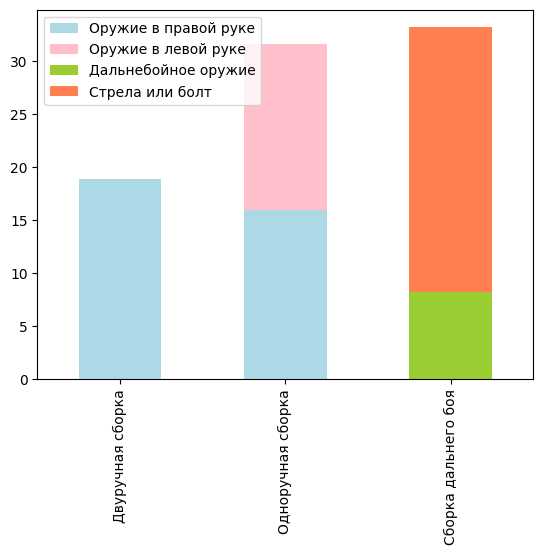

In [ ]:
df_max2.plot(kind="bar", stacked=True, color=["lightblue", "pink", "yellowgreen", "coral"])

Максимальный урон в секунду все равно достигается сборкой через лук. Имба-сборка найдена. Гипотеза не подтвердилась.

### Гипотеза 3

Наиболее распространенный тип оружия в игре - Лук.

In [ ]:
df

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed,Combat Type,DPS,Behoof
0,Ancient Nord Battle Axe,18,22.0,28,Steel Ingot,Steel,Battleaxe,Two-Handed,0.7,Close Combat,12.6,0.642857
1,Daedric Battleaxe,25,27.0,2750,Ebony Ingot,Daedric,Battleaxe,Two-Handed,0.7,Close Combat,17.5,0.009091
2,Dragonbone Battleaxe,26,30.0,3000,Dragon Bone,Dragon,Battleaxe,Two-Handed,0.7,Close Combat,18.2,0.008667
3,Drainblood Battleaxe,21,5.0,266,None,None,Battleaxe,Two-Handed,0.7,Close Combat,14.7,0.078947
4,Dwarven Battleaxe,20,23.0,300,Dwarven Metal Ingot,Dwarven,Battleaxe,Two-Handed,0.7,Close Combat,14.0,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...
288,Exploding Steel Bolt of Ice,10,0.0,5,None,None,Bolt,Archery,0.0,Projectile,0.0,2.000000
289,Exploding Steel Bolt of Shock,10,0.0,5,None,None,Bolt,Archery,0.0,Projectile,0.0,2.000000
290,Exploding Dwarven Bolt of Fire,14,0.0,15,None,None,Bolt,Archery,0.0,Projectile,0.0,0.933333
291,Exploding Dwarven Bolt of Ice,14,0.0,15,None,None,Bolt,Archery,0.0,Projectile,0.0,0.933333


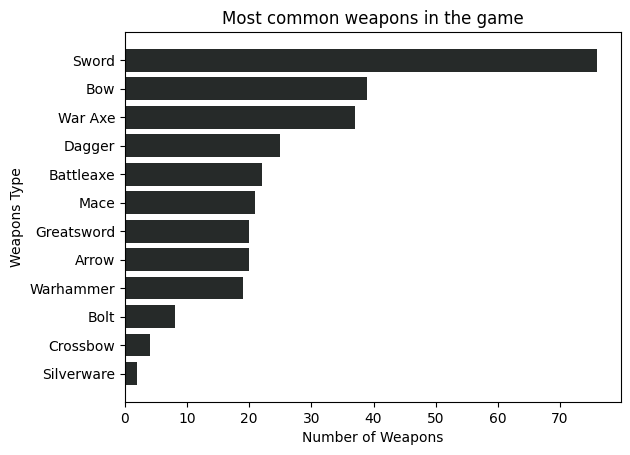

In [ ]:
weapons_types = df.groupby('Type').count().sort_values(by='Name')['Name']
plt.barh(weapons_types.index, weapons_types.values, color = '#262a29')

plt.title('Most common weapons in the game')
plt.ylabel('Weapons Type')
plt.xlabel('Number of Weapons')


plt.show()

Гипотеза не подтвердилась. Наиболее распространенный тип - меч.

### Гипотеза 4

Наиболее распространенная категория оружия в игре - одноручное.

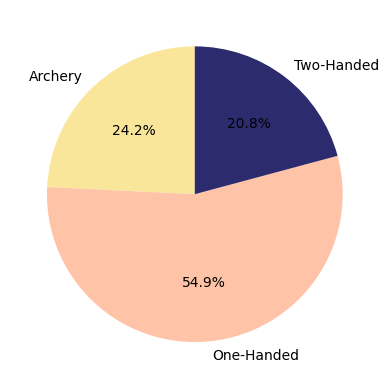

In [ ]:
weapons_categories = df.groupby('Category').count()['Name']

pie_labels = weapons_categories.index
pie_sizes = weapons_categories.values

pie_chart, pie_ax = plt.subplots()
pie_ax.pie(pie_sizes, labels=pie_labels, autopct='%1.1f%%', startangle=90, colors = ['#fae69b', '#ffc3a7', '#2b2b6d'])
plt.savefig('my_plot.svg', transparent=True)
plt.show()

Гипотеза подтвердилась. Более половины всего оружия в игре относится к категории "Одноручное".

###Гипотеза 5

Урон оружия напрямую зависит от его веса

<Figure size 640x480 with 0 Axes>

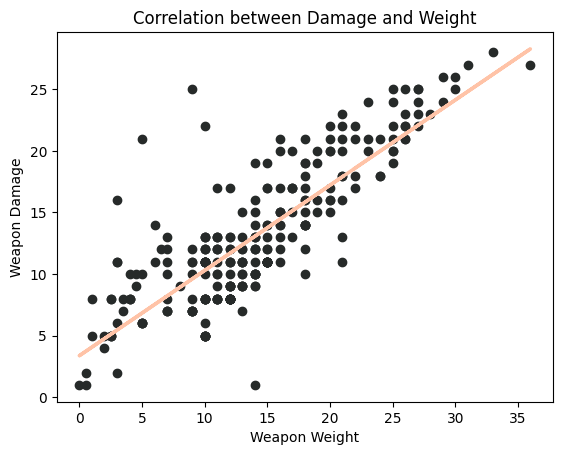

In [ ]:
# создадим таблицу без болтов и стрел, тк их вес 0 и они помешают нормальной интерпретации


no_arrows_df = df.query('Type != "Arrow" & Type != "Bolt"')

weapons_weight = no_arrows_df['Weight']
weapons_damage = no_arrows_df['Damage']

plt.figure(facecolor='yellow')

sct_fig, sct_ax = plt.subplots()
sct_ax.scatter(weapons_weight, weapons_damage, color='#262a29')
b, a = np.polyfit(weapons_weight, weapons_damage, deg=1)
sct_ax.plot(weapons_weight, a + b * weapons_weight, color='#ffc3a7', lw=2.5);

plt.title('Correlation between Damage and Weight')
plt.ylabel('Weapon Damage')
plt.xlabel('Weapon Weight')



plt.show()

Зависимость четко прослеживается. Гипотеза подтвердилась.

##Гипотеза 6

Перк "Драконья кость" наиболее дорогой

<BarContainer object of 10 artists>

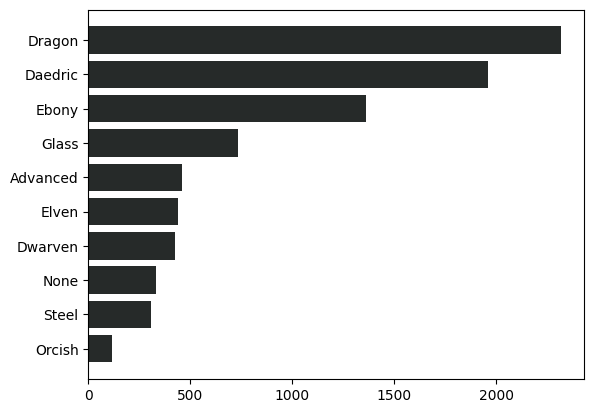

In [ ]:
perk_gold = df.groupby('Perk')[['Gold']].mean().sort_values(by='Gold')['Gold']
plt.barh(perk_gold.index, perk_gold.values, color='#262a29')

Гипотеза подтвердилась. Оружие из драконьей кости самое дорогое в игре, орочье оружие - самое дешевое. Диаграмма показывает рейтинг перков в зависимости от их средней стоимости.

## Модель линейной регрессии


In [ ]:
import statsmodels.api as sm

In [ ]:
df

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed,Combat Type,DPS,Behoof
0,Ancient Nord Battle Axe,18,22.0,28,Steel Ingot,Steel,Battleaxe,Two-Handed,0.7,Close Combat,12.6,0.642857
1,Daedric Battleaxe,25,27.0,2750,Ebony Ingot,Daedric,Battleaxe,Two-Handed,0.7,Close Combat,17.5,0.009091
2,Dragonbone Battleaxe,26,30.0,3000,Dragon Bone,Dragon,Battleaxe,Two-Handed,0.7,Close Combat,18.2,0.008667
3,Drainblood Battleaxe,21,5.0,266,None,None,Battleaxe,Two-Handed,0.7,Close Combat,14.7,0.078947
4,Dwarven Battleaxe,20,23.0,300,Dwarven Metal Ingot,Dwarven,Battleaxe,Two-Handed,0.7,Close Combat,14.0,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...
288,Exploding Steel Bolt of Ice,10,0.0,5,None,None,Bolt,Archery,0.0,Projectile,0.0,2.000000
289,Exploding Steel Bolt of Shock,10,0.0,5,None,None,Bolt,Archery,0.0,Projectile,0.0,2.000000
290,Exploding Dwarven Bolt of Fire,14,0.0,15,None,None,Bolt,Archery,0.0,Projectile,0.0,0.933333
291,Exploding Dwarven Bolt of Ice,14,0.0,15,None,None,Bolt,Archery,0.0,Projectile,0.0,0.933333


In [ ]:
df = df.drop(columns=['Name']) # имя мы никак не можем обработать и дропаем
df

,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed,Combat Type,DPS,Behoof
0,18,22.0,28,Steel Ingot,Steel,Battleaxe,Two-Handed,0.7,Close Combat,12.6,0.642857
1,25,27.0,2750,Ebony Ingot,Daedric,Battleaxe,Two-Handed,0.7,Close Combat,17.5,0.009091
2,26,30.0,3000,Dragon Bone,Dragon,Battleaxe,Two-Handed,0.7,Close Combat,18.2,0.008667
3,21,5.0,266,None,None,Battleaxe,Two-Handed,0.7,Close Combat,14.7,0.078947
4,20,23.0,300,Dwarven Metal Ingot,Dwarven,Battleaxe,Two-Handed,0.7,Close Combat,14.0,0.066667
...,...,...,...,...,...,...,...,...,...,...,...
288,10,0.0,5,None,None,Bolt,Archery,0.0,Projectile,0.0,2.000000
289,10,0.0,5,None,None,Bolt,Archery,0.0,Projectile,0.0,2.000000
290,14,0.0,15,None,None,Bolt,Archery,0.0,Projectile,0.0,0.933333
291,14,0.0,15,None,None,Bolt,Archery,0.0,Projectile,0.0,0.933333


Попробуем предсказать урон с помощью модели линейной регрессии.

In [ ]:
predicted_col = 'Damage'

### Вариант 1: только числа

In [ ]:
prep_df = df.select_dtypes(include='number')  # выбираем только числовые столбцы
prep_df

,Damage,Weight,Gold,Speed,DPS,Behoof
0,18,22.0,28,0.7,12.6,0.642857
1,25,27.0,2750,0.7,17.5,0.009091
2,26,30.0,3000,0.7,18.2,0.008667
3,21,5.0,266,0.7,14.7,0.078947
4,20,23.0,300,0.7,14.0,0.066667
...,...,...,...,...,...,...
288,10,0.0,5,0.0,0.0,2.000000
289,10,0.0,5,0.0,0.0,2.000000
290,14,0.0,15,0.0,0.0,0.933333
291,14,0.0,15,0.0,0.0,0.933333


In [ ]:
predicted_col = 'Damage'

In [ ]:
model = sm.OLS(
    endog=prep_df[predicted_col],
    exog=sm.add_constant(prep_df.drop(columns=[predicted_col]))
)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Damage   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     199.3
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           3.95e-91
Time:                        17:22:09   Log-Likelihood:                -705.37
No. Observations:                 293   AIC:                             1423.
Df Residuals:                     287   BIC:                             1445.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.7567      0.632     20.176      0.000      11.512      14.001
Weight         0.1960      0.034      5.792      0.000       0.129       0.263
Gold           0.0010      0.000      3.901      0.000       0.000       0.002
Speed        -11.6330      0.694    -16.767      0.000     -12.999     -10.267
DPS            0.7139      0.059     12.018      0.000       0.597       0.831
Behoof         0.0865      0.116      0.746      0.456      -0.142       0.315
==============================================================================
Omnibus:                       46.706   Durbin-Watson:                   1.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.142
Skew:                          -0.068   Prob(JB):                    5.41e-100
Kurtosis:                       9.118   Cond. No.                     5.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
result_df = prep_df
result_df['Prediction'] = result.predict()
result_df[[predicted_col, 'Prediction']]

,Damage,Prediction
0,18,18.003656
1,25,25.171477
2,26,26.511141
3,21,16.362709
4,20,19.423499
...,...,...
288,10,12.934725
289,10,12.934725
290,14,12.852528
291,14,12.852528


In [ ]:
result_df['Error'] = 100 * np.abs(result_df['Prediction'] / result_df[predicted_col] - 1)
result_df[[predicted_col, 'Prediction', 'Error']].sort_values(by='Error')

,Damage,Prediction,Error
142,11,11.000261,0.002371
0,18,18.003656,0.020309
141,11,11.020315,0.184684
132,11,11.020315,0.184684
16,18,18.051385,0.285475
...,...,...,...
277,4,13.102710,227.567750
161,1,5.693802,469.380219
182,2,13.028672,551.433609
181,1,12.876982,1187.698161


Модель не очень точная. Получились плохие результаты. Продемонстрируем их на графике.

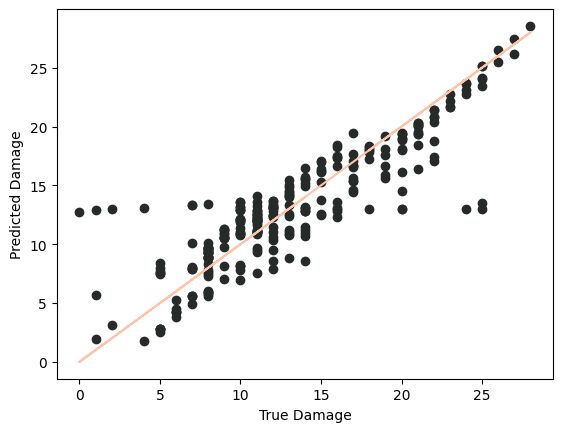

In [ ]:
plt.scatter(result_df[predicted_col], result_df['Prediction'], color='#262a29')
plt.plot(result_df[predicted_col], result_df[predicted_col], color='#ffc3a7')
plt.xlabel(f'True {predicted_col}')
plt.ylabel(f'Predicted {predicted_col}')
plt.show()

In [ ]:
result_df[[predicted_col, "Prediction", "Error"]].describe()

,Damage,Prediction,Error
count,293.000000,293.000000,293.000000
mean,13.017065,13.017065,inf
std,5.692736,5.016149,NaN
min,0.000000,1.782625,0.002371
25%,9.000000,9.684733,6.689380
50%,12.000000,12.589940,13.343068
75%,17.000000,16.129636,21.089105
max,28.000000,28.548338,inf


Половина значений отклоняется на 13%, а 75% значений на 21%. Это плохие результаты.

### Вариент 2: категориальные переменные

Попробуем для обучения модели использовать не только числовые, но и категориальные переменные

In [ ]:
prep_df = pd.get_dummies(df).astype(float)  # используем One-Hot Encoding для категориальных переменных и приводим к float, потому что sm не может обрабатывать bool
prep_df

,Damage,Weight,Gold,Speed,DPS,Behoof,Upgrade_3 Ectoplasm,Upgrade_Chaurus Chitin,Upgrade_Daedra HeartEbony Ingot,Upgrade_Dragon Bone,...,Type_Sword,Type_War Axe,Type_Warhammer,Category_Archery,Category_One-Handed,Category_Two-Handed,Combat Type_Close Combat,Combat Type_Projectile,Combat Type_Ranged Combat,Combat Type_Utensil
0,18.0,22.0,28.0,0.7,12.6,0.642857,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,25.0,27.0,2750.0,0.7,17.5,0.009091,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,26.0,30.0,3000.0,0.7,18.2,0.008667,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,21.0,5.0,266.0,0.7,14.7,0.078947,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,20.0,23.0,300.0,0.7,14.0,0.066667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,10.0,0.0,5.0,0.0,0.0,2.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
289,10.0,0.0,5.0,0.0,0.0,2.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
290,14.0,0.0,15.0,0.0,0.0,0.933333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
291,14.0,0.0,15.0,0.0,0.0,0.933333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
model = sm.OLS(
    endog=prep_df[predicted_col],
    exog=sm.add_constant(prep_df.drop(columns=[predicted_col]))
)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Damage   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     55.44
Date:                Thu, 21 Mar 2024   Prob (F-statistic):          5.93e-102
Time:                        17:33:16   Log-Likelihood:                -598.22
No. Observations:                 293   AIC:                             1274.
Df Residuals:                     254   BIC:                             1418.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               6.3165      0.615     10.271      0.000       5.105       7.528
Weight                              0.0524      0.049      1.076      0.283      -0.044       0.148
Gold                                0.0006      0.000      1.827      0.069   -4.41e-05       0.001
Speed                             -14.6707      2.387     -6.145      0.000     -19.372      -9.969
DPS                                 1.0682      0.084     12.780      0.000       0.904       1.233
Behoof                              0.0662      0.094      0.702      0.483      -0.120       0.252
Upgrade_3 Ectoplasm                 0.9853      1.981      0.497      0.619      -2.916       4.887
Upgrade_Chaurus Chitin             -0.1537      1.284     -0.120      0.905      -2.683       2.375
Upgrade_Daedra HeartEbony Ingot     0.4979      2.137      0.233      0.816      -3.711       4.707
Upgrade_Dragon Bone                 0.2228      0.463      0.482      0.630      -0.688       1.134
Upgrade_Dwarven Metal Ingot         0.6837      0.977      0.700      0.485      -1.240       2.607
Upgrade_Dwarven metal ingot         2.9076      2.010      1.447      0.149      -1.051       6.866
Upgrade_Ebony Ingot                -0.4946      0.715     -0.692      0.490      -1.903       0.914
Upgrade_Firewood                    0.4406      1.500      0.294      0.769      -2.513       3.394
Upgrade_Iron Ingot                  0.2462      0.691      0.356      0.722      -1.114       1.606
Upgrade_Leather Strips             -0.8563      1.613     -0.531      0.596      -4.033       2.320
Upgrade_None                        0.6285      0.620      1.014      0.311      -0.592       1.849
Upgrade_Orichalcum Ingot            0.4435      0.342      1.298      0.195      -0.229       1.116
Upgrade_Quicksilver Ingot          -0.3945      1.024     -0.385      0.700      -2.411       1.622
Upgrade_Refined Malachite           0.3199      0.283      1.131      0.259      -0.237       0.877
Upgrade_Refined Moonstone           0.4707      0.295      1.597      0.111      -0.110       1.051
Upgrade_Silver Ingot                0.5823      2.015      0.289      0.773      -3.386       4.550
Upgrade_Stalhrim                   -0.5953      1.207     -0.493      0.622      -2.972       1.781
Upgrade_Steel Ingot                 0.3817      0.655      0.583      0.561      -0.908       1.672
Perk_Advanced                       1.2518      1.141      1.097      0.274      -0.995       3.498
Perk_Daedric                        0.8328      0.827      1.006      0.315      -0.797       2.462
Perk_Dragon                         0.2228      0.463      0.482      0.630      -0.688       1.134
Perk_Dwarven                        0.3954      0.684      0.578      0.564      -0

In [ ]:
result_df = prep_df
result_df['Prediction'] = result.predict()
result_df[[predicted_col, 'Prediction']]

,Damage,Prediction
0,18.0,18.423889
1,25.0,24.823083
2,26.0,25.977454
3,21.0,20.194130
4,20.0,20.227578
...,...,...
288,10.0,11.936481
289,10.0,11.936481
290,14.0,11.871517
291,14.0,11.871517


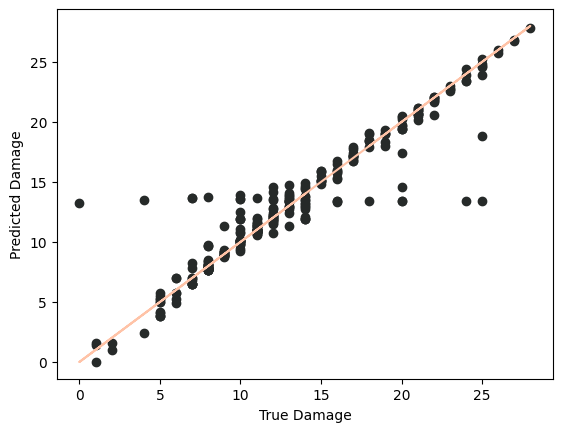

In [ ]:
plt.figure()
plt.scatter(result_df[predicted_col], result_df['Prediction'], color='#262a29')
plt.plot(result_df[predicted_col], result_df[predicted_col], color='#ffc3a7')
plt.xlabel(f'True {predicted_col}')
plt.ylabel(f'Predicted {predicted_col}')
plt.show()

Результаты стали намного лучше.

In [ ]:
result_df['Error'] = 100 * np.abs(result_df['Prediction'] / result_df[predicted_col] - 1)
result_df[[predicted_col, 'Prediction', 'Error']].sort_values(by='Error')

,Damage,Prediction,Error
117,16.0,16.000000,1.243450e-12
185,21.0,21.000000,4.041212e-12
101,8.0,8.000000,5.329071e-12
246,7.0,7.000000,1.328937e-11
229,7.0,7.000000,1.328937e-11
...,...,...,...
269,7.0,13.686105,9.551579e+01
270,7.0,13.686105,9.551579e+01
126,1.0,0.007679,9.923214e+01
277,4.0,13.486847,2.371712e+02


In [ ]:
result_df[[predicted_col, "Prediction", "Error"]].describe()

,Damage,Prediction,Error
count,293.000000,293.000000,2.930000e+02
mean,13.017065,13.017065,inf
std,5.692736,5.377781,NaN
min,0.000000,0.007679,1.243450e-12
25%,9.000000,9.251673,1.115716e+00
50%,12.000000,12.058829,2.742675e+00
75%,17.000000,15.934333,6.832906e+00
max,28.000000,27.858672,inf


Максимальное отклонение составило меньше 1 урона, что показывает большую точность модели по сравнению с той, которая обучалась исключительно на числовых столбцах.